In [1]:
from CLasso import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
To generate the data :
'''

m,d,d_nonzero,k,sigma =100,200,5,5,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)

In [3]:
'''
To define the problem :
'''

problem = classo_problem(X,y)

In [4]:
'''
To solve the problem with its default parameters :
'''
problem.solve()

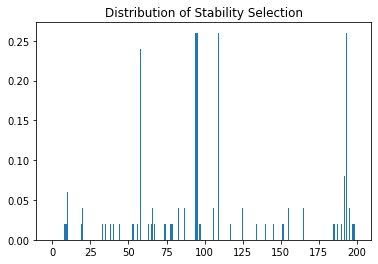

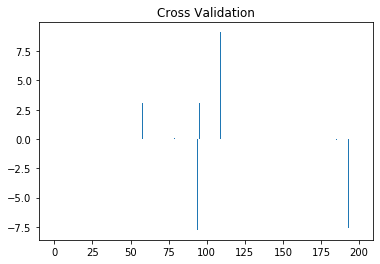

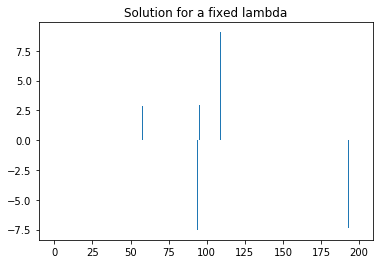

 Running time for CV       : 2.999s 
 Running time for SS       : 0.72s 
 Running time for LAMfixed : 0.077s

In [5]:
'''
To plot the solutions :
'''

problem.solution

In [6]:
'''
To see the variables in problem, 
then one can just plot problem.rescale for instance to see its value :
'''

problem.__dict__.keys()

dict_keys(['data', 'rho', 'formulation', 'model_selection', 'solution'])

In [7]:
'''
To know what are the Stability Selection parameters :
(also works for Cross Validation parameters, or fixed Lam parameters)
'''

problem.model_selection.SSparameters.__dict__

{'seed': 1,
 'formulation': 'Concomitant',
 'numerical_method': 'ODE',
 'method': 'first',
 'B': 50,
 'q': 10,
 'pourcent_nS': 0.5,
 'lamin': 0.01,
 'hd': False,
 'lam': 'theoritical',
 'theoritical_lam': 0.6337}

In [8]:
'''
To get a parameter of the solution :
'''
print("sigma     = ", problem.solution.sigma_LAMfixed)
print("lambdamax = ", problem.solution.lambdamax)

sigma     =  0.7120180830981705
lambdamax =  0.6953821775711149


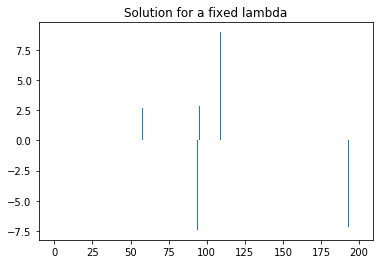

 Running time for CV       : 0s 
 Running time for SS       : 0s 
 Running time for LAMfixed : 11.645s

In [11]:
'''
To solve a problem different than the default parameters :

'''
problem = classo_problem(X,y)
MS = problem.model_selection
MS.SS = False
MS.CV = False
MS.LAMparameters.lam = 0.1
MS.LAMparameters.formulation = 'Huber'
MS.LAMparameters.numerical_method = '2prox'
problem.solve()
problem.solution

In [12]:
'''
To show that the CV (also works for SS) depends only on the seed we choose :

'''
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution



MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution

b1, b2, b3 = solution1.beta_CV, solution2.beta_CV, solution3.beta_CV 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

Difference of solution beta for same seed  0.0
Difference of solution beta for different seeds  0.023020419275032282
